Instalación e Importación de Librerías

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
from google.colab import drive
import pandas as pd


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Definir la ruta absoluta del archivo CSV dentro de Google Drive y se carga en un DataFrame de Pandas (df) para su manipulación.

In [20]:
# Definición de la ruta del archivo CSV. Ajustar esta ruta según su ubicación en Drive.
FILE_PATH = '/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Cargar el dataset en un DataFrame
try:
    data = pd.read_csv(FILE_PATH)
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta: {FILE_PATH}")

Dataset cargado exitosamente.


Preprocesamiento y Vista general

In [21]:
def inicial_inspection(dataset):
    numero_filas_columnas = f'Numero de filas y columnas: {dataset.shape}'
    titulo_info = 'Informacion completa:'

    suma_nulos = f'Suma valores nulos: {dataset.isnull().sum()}'
    suma_duplicados = f'suma de los duplicados: {dataset.duplicated().sum()}'

    print(titulo_info)
    dataset.info()

    return numero_filas_columnas,suma_nulos, suma_duplicados

print(inicial_inspection(data))

Informacion completa:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

Limpieza de Datos — clean_data()

Este script realiza una serie de transformaciones y limpiezas sobre un dataset de clientes (por ejemplo, para análisis de "churn").


In [22]:
dataset = data.copy()

def clean_data(data):
    #Sustituir los espacios en blanco (' ') por el valor nulo estándar de Pandas (np.nan)
    data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

    #Convertir la columna al tipo numérico (float)
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

    # Simplificar categorías
    replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in replace_cols:
        if col in data.columns:
            data[col] = data[col].replace({'No internet service': 'No'})

    # Manipular valores null
    data = data.dropna()

    data = data.reset_index(drop=True)

    # Eliminar duplicados
    data = data.drop_duplicates()

    # pasar a un archivo csv
    data.to_csv(r'C:\Users\User\Documents\customer-churn-analysis\Data\cleaned_data')

    return data

cleaned_data = clean_data(dataset)
print(cleaned_data)
dataset.info()


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7027  6840-RESVB    Male              0     Yes        Yes      24   
7028  2234-XADUH  Female              0     Yes        Yes      72   
7029  4801-JZAZL  Female              0     Yes        Yes      11   
7030  8361-LTMKD    Male              1     Yes         No       4   
7031  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

Análisis Descriptivo — descriptive_analysis()

Este script realiza un análisis descriptivo inicial del dataset de clientes de telecomunicaciones, explorando métricas clave como la tasa de abandono, tipos de contrato, métodos de pago, distribución por género y antigüedad de los clientes.

1 - Tasa de churn: muestra qué porcentaje de clientes abandonaron el servicio.

2 - Distribución de contratos: si “Month-to-month” es alto, es normal que el churn también lo sea.

3 - Métodos de pago: el “Electronic check” suele asociarse con mayor churn.

4 - Género y antigüedad: ayudan a perfilar los grupos con más retenció

In [23]:


def descriptive_analysis(data_df):
    """
    Performs an initial descriptive analysis of the Telco Customer Churn dataset.
    Returns:
        dict: Key metrics and distributions including churn rate, customer status,
              contract types, payment methods, gender distribution, and tenure summary.
    """

    # Convertir columna 'Churn' a minúsculas para evitar errores de comparación
    data_df['Churn'] = data_df['Churn'].str.lower()
    data_df['Contract'] = data_df['Contract'].str.lower()

    #porcentaje total de clientes que abandonaron el servicio (churn)

    total_costomers = len(data_df)
    total_churn = len(data_df[data_df['Churn'] == 'yes'])
    churn_porcent = round((total_churn/total_costomers) * 100, 2)

    #clientes permanecen activos vs. los que se fueron
    active_costomer = len(data_df[data_df['Churn'] == 'no'])
    summary_customers = f'Hay {active_costomer} clientes activos y {total_churn} que se han ido'


    #distribucion del tipo de contrato (mensual, anual, bianual)
    distribution_contract = data_df['Contract'].value_counts()

    #métodos de pago son los más utilizados por los clientes

    payment_method  = data_df['PaymentMethod'].value_counts()

    #distribuyen los clientes por género
    distribution_gender = data_df['gender'].value_counts()

    #rango de antigüedad (tenure) de los clientes
    tenure_summary = data_df['tenure'].describe().round(2)


    return {'porcentaje churn':churn_porcent,
            'summary_customers':summary_customers,
            'Distribucion_Contrato': distribution_contract,
            'Metodos_Pago': payment_method,
            'Distribucion_Genero': distribution_gender,
            'Resumen_Tenure': tenure_summary
    }

results = descriptive_analysis(cleaned_data)
print("\n===== DESCRIPTIVE ANALYSIS REPORT =====")
for key, value in results.items():
    print(f"\n🔹 {key.upper()}:\n{value}")


===== DESCRIPTIVE ANALYSIS REPORT =====

🔹 PORCENTAJE CHURN:
26.58

🔹 SUMMARY_CUSTOMERS:
Hay 5163 clientes activos y 1869 que se han ido

🔹 DISTRIBUCION_CONTRATO:
Contract
month-to-month    3875
two year          1685
one year          1472
Name: count, dtype: int64

🔹 METODOS_PAGO:
PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

🔹 DISTRIBUCION_GENERO:
gender
Male      3549
Female    3483
Name: count, dtype: int64

🔹 RESUMEN_TENURE:
count    7032.00
mean       32.42
std        24.55
min         1.00
25%         9.00
50%        29.00
75%        55.00
max        72.00
Name: tenure, dtype: float64


Análisis Exploratorio — datos_exploratory()

Este script realiza un análisis exploratorio del churn (abandono de clientes) según distintos factores: tipo de contrato, método de pago, servicios contratados y antigüedad del cliente.

In [24]:
cleaned_data.columns = cleaned_data.columns.str.strip() #Eliminar espacios


def datos_exploratory_completo(data):
    """Calcula suma y porcentaje de churn por variables clave."""

    # Normalizar texto
    data['Churn'] = data['Churn'].str.lower().str.strip()
    data['Churn_numeric'] = data['Churn'].map({'yes': 1, 'no': 0})

    # Función auxiliar para calcular porcentaje
    def churn_percentage(group):
        return round(group.mean() * 100, 2)  # Convertir a porcentaje

    # Churn por tipo de contrato
    churn_contract_sum = data.groupby('Contract')['Churn_numeric'].sum().sort_values(ascending=False)
    churn_contract_pct = data.groupby('Contract')['Churn_numeric'].apply(churn_percentage).sort_values(ascending=False)

    # Churn por método de pago
    churn_payment_sum = data.groupby('PaymentMethod')['Churn_numeric'].sum().sort_values(ascending=False)
    churn_payment_pct = data.groupby('PaymentMethod')['Churn_numeric'].apply(churn_percentage).sort_values(ascending=False)

    # Churn por servicios contratados
    churn_service_sum = data.groupby(['InternetService', 'OnlineSecurity', 'StreamingMovies'])['Churn_numeric'].sum().sort_values(ascending=False)
    churn_service_pct = data.groupby(['InternetService', 'OnlineSecurity', 'StreamingMovies'])['Churn_numeric'].apply(churn_percentage).sort_values(ascending=False)

    # Churn vs. antigüedad del cliente
    churn_tenure_sum = data.groupby('tenure')['Churn_numeric'].sum()
    churn_tenure_pct = data.groupby('tenure')['Churn_numeric'].apply(churn_percentage)

    return {
        'Contract': {'sum': churn_contract_sum, 'pct': churn_contract_pct},
        'PaymentMethod': {'sum': churn_payment_sum, 'pct': churn_payment_pct},
        'Services': {'sum': churn_service_sum, 'pct': churn_service_pct},
        'Tenure': {'sum': churn_tenure_sum, 'pct': churn_tenure_pct}
    }

# Ejecutar análisis exploratorio
resultados_churn = datos_exploratory_completo(cleaned_data)

# Ejemplo de cómo ver resultados
print("Churn por contrato (porcentaje):")
print(resultados_churn['Contract']['pct'])
print("\nChurn por contrato (suma):")
print(resultados_churn['Contract']['sum'])

Churn por contrato (porcentaje):
Contract
month-to-month    42.71
one year          11.28
two year           2.85
Name: Churn_numeric, dtype: float64

Churn por contrato (suma):
Contract
month-to-month    1655
one year           166
two year            48
Name: Churn_numeric, dtype: int64


** Churn por tipo de contrato**

Los contratos mensuales (Month-to-month) muestran la mayor tasa de abandono, porque los clientes pueden cancelar sin penalización.
En contraste, los contratos anuales o bianuales tienden a retener mejor a los clientes gracias a su compromiso prolongado.

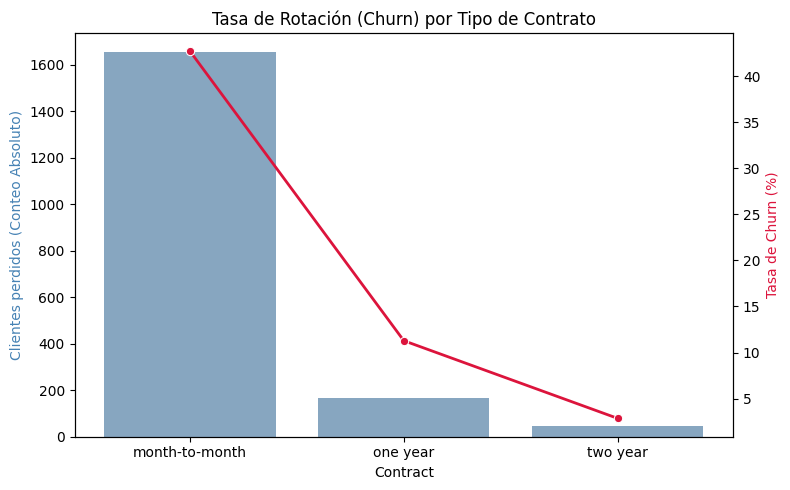


Insight: El contrato con mayor tasa de Churn es 'month-to-month' con un 42.71%.
Esto indica que las estrategias de retención deben enfocarse urgentemente en este grupo de corta duración.


In [25]:
def plot_churn_contract(resultados):
    # 1. Creación del DataFrame temporal para graficar
    df = pd.DataFrame({
        'Clientes perdidos': resultados['Contract']['sum'],
        'Churn (%)': resultados['Contract']['pct']
    }).sort_values('Churn (%)', ascending=False)

    # 2. Inicialización de la figura y el eje principal (ax1)
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # 3. Barplot para Clientes perdidos (MAGNITUD) en el eje izquierdo (ax1)
    # CORRECCIÓN CLAVE: En Seaborn, si usas `x=df.index` y `y='columna'`, debes pasar el DataFrame `df`
    sns.barplot(x=df.index, y='Clientes perdidos', data=df, ax=ax1, color='steelblue', alpha=0.7)

    # 4. Creación del eje secundario (ax2)
    ax2 = ax1.twinx()

    # 5. Lineplot para Churn (%) (SEVERIDAD) en el eje derecho (ax2)

    sns.lineplot(x=df.index, y='Churn (%)', data=df, marker='o', color='crimson', ax=ax2, linewidth=2)

    # 6. Configuración de Etiquetas y Título
    ax1.set_ylabel('Clientes perdidos (Conteo Absoluto)', color='steelblue')
    ax2.set_ylabel('Tasa de Churn (%)', color='crimson')
    ax1.set_title('Tasa de Rotación (Churn) por Tipo de Contrato')
    ax1.tick_params(axis='x', rotation=0) # Asegurar que las etiquetas X se lean bien
    plt.grid(False) # Desactivar la rejilla del segundo eje para claridad
    plt.tight_layout()
    plt.show()

    # 7. Insight
    mayor_churn = df['Churn (%)'].idxmax()
    print(f"\nInsight: El contrato con mayor tasa de Churn es '{mayor_churn}' con un {df.loc[mayor_churn, 'Churn (%)']}%.")
    print("Esto indica que las estrategias de retención deben enfocarse urgentemente en este grupo de corta duración.")

# Ejecutar análisis exploratorio (produce el diccionario anidado)
#resultados_churn = datos_exploratory_completo(cleaned_data)

# Ejecutar visualización
plot_churn_contract(resultados_churn)

Función para churn por método de pago

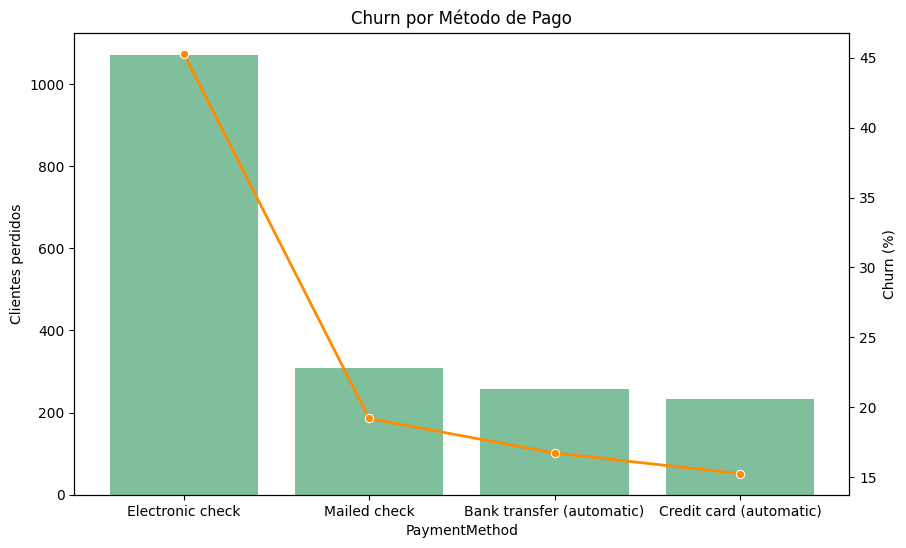

Insight: El método de pago con mayor churn es 'Electronic check'. Incentivar pagos automáticos puede reducir la pérdida de clientes.


In [26]:
# Función para churn por método de pago
def plot_churn_payment(resultados):
    df = pd.DataFrame({
        'Clientes perdidos': resultados['PaymentMethod']['sum'],
        'Churn (%)': resultados['PaymentMethod']['pct']
    }).sort_values('Churn (%)', ascending=False)

    fig, ax1 = plt.subplots(figsize=(10, 6))
    sns.barplot(x=df.index, y='Clientes perdidos', data = df, ax=ax1, color='mediumseagreen', alpha=0.7)
    ax2 = ax1.twinx()
    sns.lineplot(x=df.index, y='Churn (%)',data=df, marker='o', color='darkorange', ax=ax2, linewidth=2)
    ax1.set_ylabel('Clientes perdidos')
    ax2.set_ylabel('Churn (%)')
    ax1.set_title('Churn por Método de Pago')
    plt.xticks(rotation=45)
    plt.show()

    mayor_churn = df['Churn (%)'].idxmax()
    print(f"Insight: El método de pago con mayor churn es '{mayor_churn}'. Incentivar pagos automáticos puede reducir la pérdida de clientes.")


plot_churn_payment(resultados_churn)

**Función para churn por servicios**

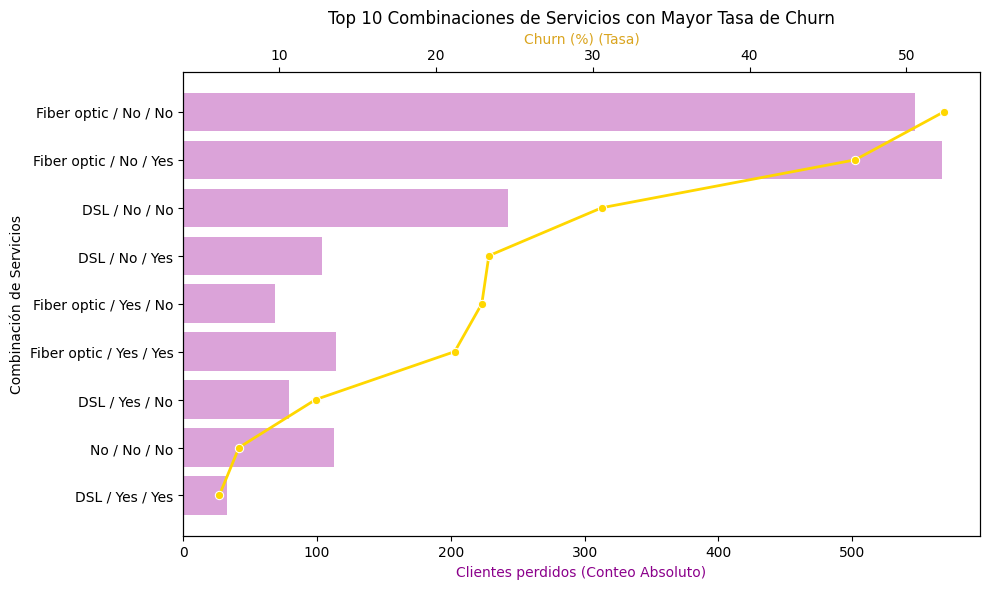


Insight: La combinación de servicios con mayor tasa de churn es Fiber optic / No / No con un 52.39%.
Esto sugiere que esta configuración de servicios en particular no está satisfaciendo las expectativas del cliente.


In [27]:
def plot_churn_services(resultados, top_n=10):
    # --- 1. Preparación de Datos ---

    # Crea el DataFrame temporal a partir de los resultados de 'Services'
    df = pd.DataFrame({
        'Clientes perdidos': resultados['Services']['sum'],
        'Churn (%)': resultados['Services']['pct']
    })

    # 🚨 PUNTOS CLAVE DE LA CORRECCIÓN 🚨
    # El MultiIndex tiene 3 niveles. Necesitamos resetearlo para usar sus valores.
    df = df.sort_values('Churn (%)', ascending=False).head(top_n).reset_index()

    # Identificamos las columnas de índice que se generaron (deben ser 3)
    index_cols = df.columns[:3].tolist() # Deberían ser las primeras 3 columnas

    # Corregimos el problema de Key Error asegurando que las columnas existen y son las correctas.
    # Si el análisis agrupa por 3 columnas, df.columns[0:3] serán esas 3.

    # 2. Creación de la Etiqueta Combinada
    df['Combinacion_Servicios'] = df[index_cols].apply(
        lambda row: ' / '.join(row.values.astype(str)), axis=1
    )

    # --- 3. Visualización (Dual-Axis Horizontal) ---

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Barplot (Conteo Absoluto - Eje Inferior)
    # Usamos Combinacion_Servicios para el eje Y
    sns.barplot(y='Combinacion_Servicios', x='Clientes perdidos', data=df, color='orchid', alpha=0.7, ax=ax1)

    # Eje secundario superior
    ax2 = ax1.twiny()

    # Lineplot (Tasa Porcentual - Eje Superior)
    sns.lineplot(x='Churn (%)', y='Combinacion_Servicios', data=df, marker='o', color='gold', ax=ax2, linewidth=2)

    # Configuración de Ejes
    ax1.set_xlabel('Clientes perdidos (Conteo Absoluto)', color='darkmagenta')
    ax2.set_xlabel('Churn (%) (Tasa)', color='goldenrod')
    ax1.set_ylabel('Combinación de Servicios')
    ax1.set_title(f'Top {top_n} Combinaciones de Servicios con Mayor Tasa de Churn')
    plt.tight_layout()
    plt.show()

    # --- 4. Insight ---
    mayor_churn_etiqueta = df.loc[df['Churn (%)'].idxmax(), 'Combinacion_Servicios']
    tasa_maxima = df['Churn (%)'].max()
    print(f"\nInsight: La combinación de servicios con mayor tasa de churn es {mayor_churn_etiqueta} con un {tasa_maxima}%.")
    print("Esto sugiere que esta configuración de servicios en particular no está satisfaciendo las expectativas del cliente.")

plot_churn_services(resultados_churn)

**Función para churn vs antigüedad del cliente**

/tmp/ipython-input-1840085584.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_sum = data.groupby('TenureGroup')['Churn_numeric'].sum()
/tmp/ipython-input-1840085584.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_pct = data.groupby('TenureGroup')['Churn_numeric'].mean() * 100


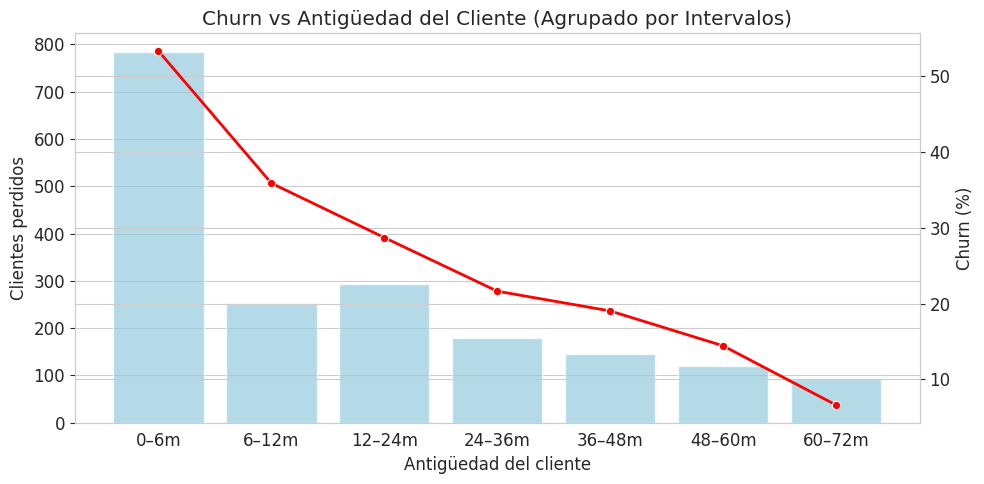

📊 **Insight sobre Churn por Antigüedad**
- Los clientes con antigüedad entre **0–6m** presentan la mayor tasa de churn: **53.3%**.
- Los clientes más leales son los de **60–72m**, con solo **6.6%** de churn.

💡 **Recomendación:** Enfocar estrategias de retención en los clientes nuevos (0–12 meses), donde se concentran las mayores pérdidas. Programas de bienvenida, soporte personalizado y descuentos tempranos pueden reducir la fuga inicial.


In [33]:
sns.set_style("whitegrid")
plt.rcParams.update({'figure.figsize':(10,5), 'font.size':12})

def plot_churn_tenure_grouped(data):
    """Visualiza churn agrupado por rangos de antigüedad con insight interpretativo."""

    # Normalizar texto
    data['Churn'] = data['Churn'].str.lower().str.strip()
    data['Churn_numeric'] = data['Churn'].map({'yes': 1, 'no': 0})

    # Crear intervalos de tenure
    bins = [0, 6, 12, 24, 36, 48, 60, 72]
    labels = ['0–6m', '6–12m', '12–24m', '24–36m', '36–48m', '48–60m', '60–72m']
    data['TenureGroup'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=True)

    # Calcular churn por grupo
    churn_sum = data.groupby('TenureGroup')['Churn_numeric'].sum()
    churn_pct = data.groupby('TenureGroup')['Churn_numeric'].mean() * 100

    # Crear DataFrame para graficar
    df = pd.DataFrame({'Clientes perdidos': churn_sum, 'Churn (%)': churn_pct}).reset_index()

    # Gráfico
    fig, ax1 = plt.subplots(figsize=(10,5))
    sns.barplot(x='TenureGroup', y='Clientes perdidos', data=df, color='skyblue', alpha=0.7, ax=ax1)
    ax2 = ax1.twinx()
    sns.lineplot(x='TenureGroup', y='Churn (%)', data=df, marker='o', color='red', linewidth=2, ax=ax2)

    ax1.set_ylabel('Clientes perdidos')
    ax2.set_ylabel('Churn (%)')
    ax1.set_xlabel('Antigüedad del cliente')
    ax1.set_title('Churn vs Antigüedad del Cliente (Agrupado por Intervalos)')
    plt.tight_layout()
    plt.show()

    # Insight automático
    max_group = df.loc[df['Churn (%)'].idxmax(), 'TenureGroup']
    max_pct = df['Churn (%)'].max()
    min_group = df.loc[df['Churn (%)'].idxmin(), 'TenureGroup']
    min_pct = df['Churn (%)'].min()

    print("📊 **Insight sobre Churn por Antigüedad**")
    print(f"- Los clientes con antigüedad entre **{max_group}** presentan la mayor tasa de churn: **{max_pct:.1f}%**.")
    print(f"- Los clientes más leales son los de **{min_group}**, con solo **{min_pct:.1f}%** de churn.")
    print("\n💡 **Recomendación:** Enfocar estrategias de retención en los clientes nuevos (0–12 meses), donde se concentran las mayores pérdidas. Programas de bienvenida, soporte personalizado y descuentos tempranos pueden reducir la fuga inicial.")


plot_churn_tenure_grouped(cleaned_data)